# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

newton 0.2633676140724547
secante 0.2633676140721658


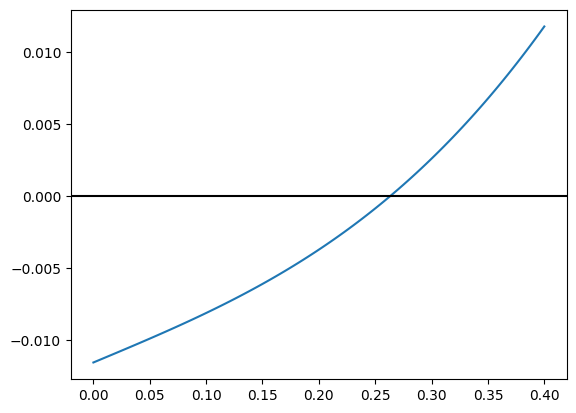

In [98]:
e=0.9672671
T=75.96000
t0=1986.1113
# como t0 es del 9 febrero de 1986 y nos piden para el 1 de abril de 1986 entre ellos dos hay 51 dias lo que en años es 0,1397
t=0.1397
M=((2*np.pi)/T)*t
f=lambda E: E-e*np.sin(E)-M
df=lambda E: 1-e*np.cos(E)
E=np.linspace(0,0.4,100)
plt.plot(E,f(E))
plt.axhline(0,color="black")
print("newton", sc.newton(f,0,df))
print("secante", sc.root_scalar(f,x0=0,x1=0.5,method="secant").root)

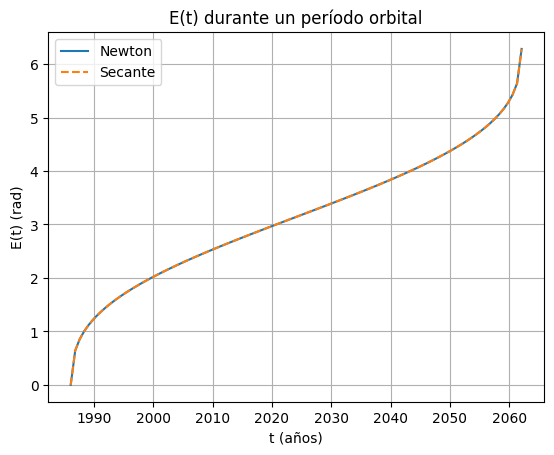

In [99]:
Δt = T / 100
ti = np.array([t0 + i * Δt for i in range(101)])
def M(t):
  return 2 * np.pi / T * (t - t0)
M_vals = M(ti)
def f(E, M):
  return E - e * np.sin(E) - M
E_newton_vals = [0]
E_secant_vals = [0]
for i in range(1, len(ti)):
  M_i = M_vals[i]
  E_prev = E_newton_vals[-1]
  df = lambda E, M: 1 - e * np.cos(E)
  E_n = sc.newton(func=f, x0=E_prev, fprime=df, args=(M_i,))
  E_newton_vals.append(E_n)
  E_s= sc.root_scalar(f, args=(M_i,), method='secant', x0=E_prev, x1=E_prev + 0.01).root
  E_secant_vals.append(E_s)
# Graficar E(t)
plt.plot(ti, E_newton_vals, label='Newton')
plt.plot(ti, E_secant_vals, '--', label='Secante')
plt.xlabel("t (años)")
plt.ylabel("E(t) (rad)")
plt.title("E(t) durante un período orbital")
plt.legend()
plt.grid()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

newton: 0.9575
secante: 0.9575
punto fijo: 0.9575


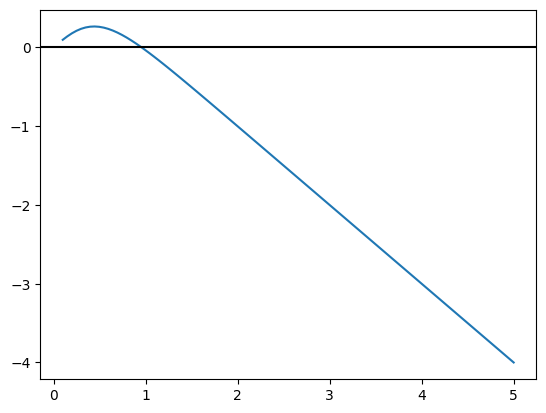

In [100]:
#a
t=0.5
def f(m):
  return np.tanh(m/t)-m
n=sc.newton(f,3,tol=1e-4)
s=sc.root_scalar(f,x0=0.5,x1=3,method="secant").root
print("newton:", round(n,4))
print("secante:", round(s,4))
#b
g=lambda m: np.tanh(m/t)
def pf(g, x0, tol=1e-4, m=100):
  for n in range(1, m+1):
    x= g(x0)
    if abs(x-x0) < tol:
      return x
    x0=x
  return print("maximo de iteraciones")
print("punto fijo:", round(pf(g,3),4))
m=np.linspace(0.1,5,100)
plt.plot(m,f(m))
plt.axhline(0,color="black")

Text(0.5, 0, 'T')

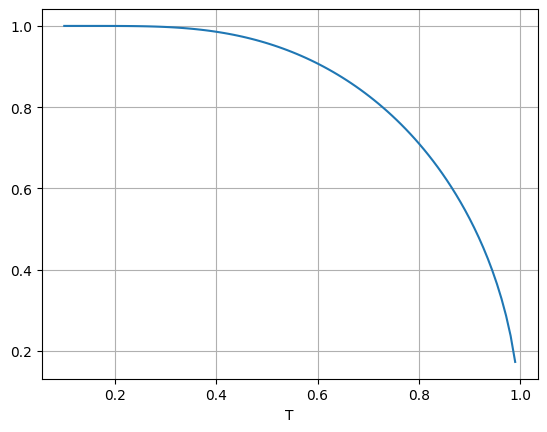

In [101]:
T=np.linspace(0.1,0.99,100)
sec=[]
for i in T:
  t=i
  sec.append(sc.root_scalar(f,x0=0.5,x1=3,method="secant").root)
plt.plot(T,sec)
plt.grid()
plt.xlabel("T")

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



<ipython-input-102-0ba00b9fb097>:4: RuntimeWarning: divide by zero encountered in log
  f=lambda T: -R*T*np.log((T/T0)**(5/2))-G
<ipython-input-102-0ba00b9fb097>:4: RuntimeWarning: invalid value encountered in multiply
  f=lambda T: -R*T*np.log((T/T0)**(5/2))-G


temperatura  T  a la cual  G=−105J: 4.44399951930784


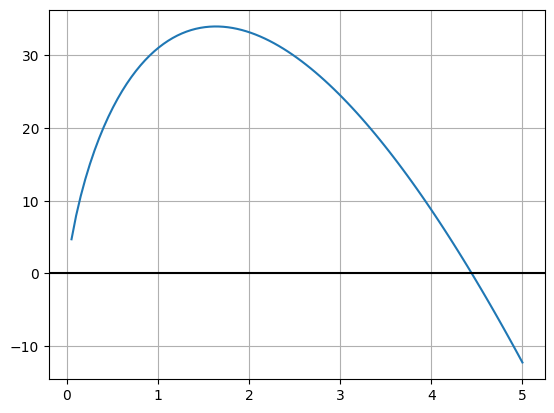

In [102]:
R=8.314
T0=4.444
G=1e-5
f=lambda T: -R*T*np.log((T/T0)**(5/2))-G
df=lambda T: (f(T+1e-8)-f(T-1e-8))/(2*1e-8)
def newton(f,df,x0,tol=1e-4,m=100):
  for i in range(1,m+1):
    if df(x0)==0:
      return print("la derivada dio 0")
    x=x0-(f(x0)/df(x0))
    if abs(x-x0)<tol:
      return x
    else:
      x0=x
  return print("maximo de iteraciones alcanzadas", x)
T=np.linspace(0,5,100)
plt.plot(T,f(T))
plt.grid()
plt.axhline(0,color="black")
print("temperatura  T  a la cual  G=−105J:", newton(f,df,3))

# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

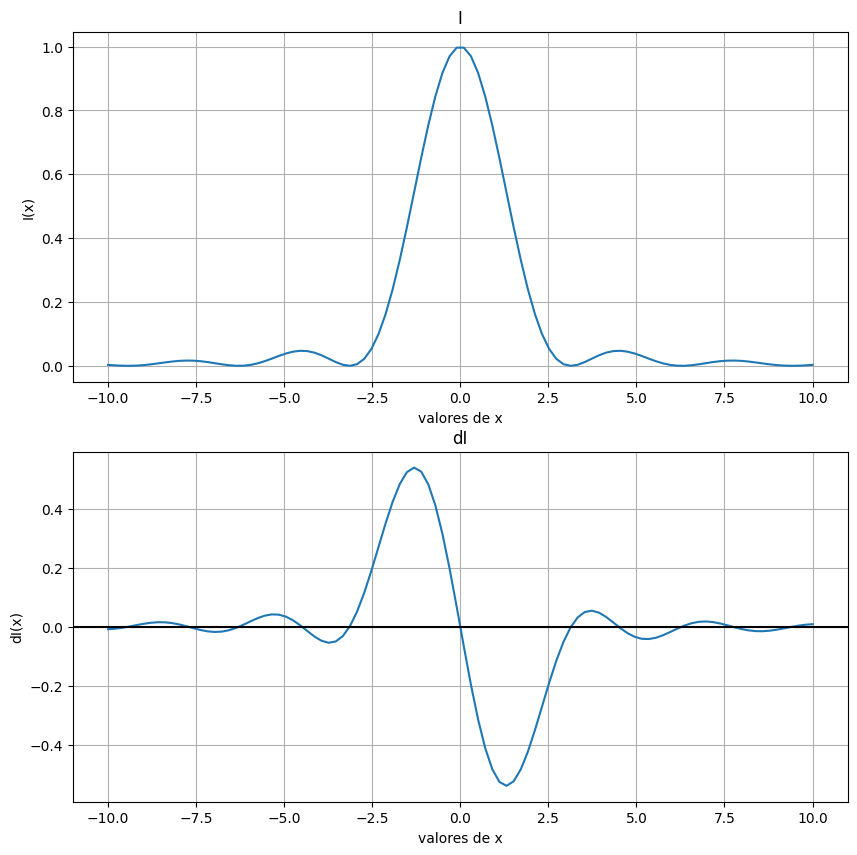

In [103]:
#a
i0=1
def i(x):
  if x==0:
    return i0
  else:
    I=i0*(np.sin(x)/x)**2
    return I
def di(x):
    if x == 0:
        return 0
    return 2*i0/x * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x
n=np.linspace(-10,10,100)
x=[]
for j in n:
  x.append(j)
div = [di(val) for val in x]
figure, axis=plt.subplots(2,1,figsize=(10,10))
axis[0].plot(x,i(x))
axis[0].grid()
axis[0].set_xlabel("valores de x")
axis[0].set_ylabel("I(x)")
axis[0].set_title("I")
axis[1].plot(x,div)
axis[1].grid()
axis[1].set_xlabel("valores de x")
axis[1].set_ylabel("dI(x)")
axis[1].set_title("dI")
axis[1].axhline(0,color="black")

1.3915573782515291


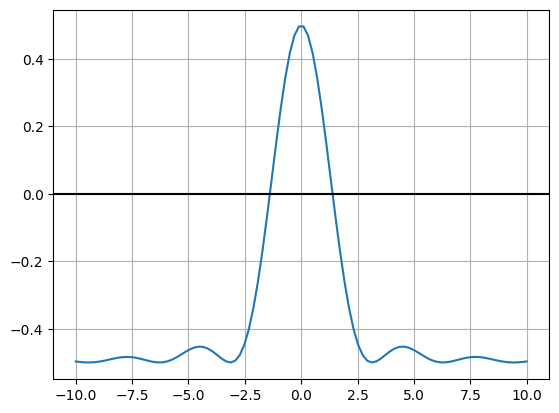

In [104]:
#b
def I(x):
  if x==0:
    return i0-i0/2
  else:
    I=i0*(np.sin(x)/x)**2-i0/2
    return I
def secante(f,x0,x1,tol=1e-4,m=100):
  for i in range(1,m+1):
    x=x1-((f(x1)*(x1-x0))/(f(x1)-f(x0)))
    if abs(x-x1)<tol:
      return x
    else:
      x0=x1
      x1=x
  return print("maximo de iteraciones", x)
plt.plot(x,I(x))
plt.grid()
plt.axhline(0,color="black")
print(secante(I,np.pi,1,1e-8))

In [105]:
#c
tol=1e-2
max=[]
for i in range(-10,11):
  n=i-1
  c=secante(di,n,i)
  b=True
  if di(c+0.1)<0 and -10<=c<=10:
    for i in max:
      if abs(c-i)<tol:
        b=False
    if b==True:
      max.append(c)
print(max)

[np.float64(-7.725251844711842), np.float64(-4.4934094720916695), np.float64(0.0), np.float64(4.493409457862926), np.float64(7.725251829270713)]


In [106]:
# tomar intervalos de 0.5 de distancia
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
  for _ in range(max_iter):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
      return print("fa y fb tienen signos iguales")
    c = b - fb * (b - a) / (fb - fa)
    fc = f(c)
    if abs(fc) < tol:
      return c
    if fa * fc < 0:
      b = c
    else:
      a = c
  return None
h = 0.5
x = np.arange(-10, 10, h)
raices = []
for i in range(len(x)-1):
  if di(x[i]) * di(x[i+1]) < 0:
    raiz = regula_falsi(di, x[i], x[i+1])
    raices.append(raiz)
print(raices)

[np.float64(-9.424778908059867), np.float64(-7.7252518797947545), np.float64(-6.283200785726028), np.float64(-4.4934100239108865), np.float64(-3.14159411630774), np.float64(3.14159411630774), np.float64(4.4934100239108865), np.float64(6.283200785726028), np.float64(7.7252518797947545), np.float64(9.424778908059867)]


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

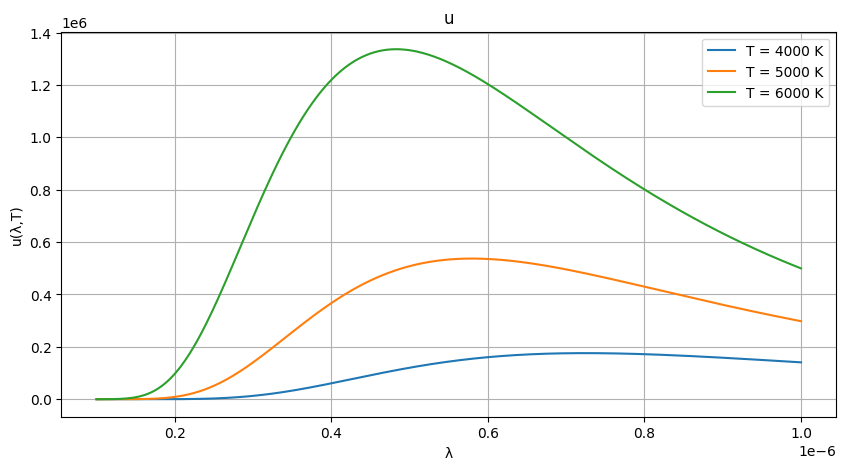

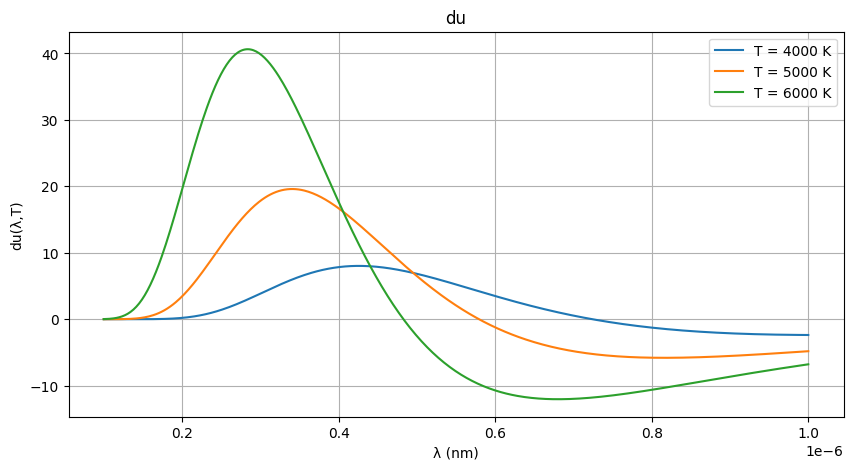

In [107]:
h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
def u(l, t):
    l0 = h*c/(kB*t)
    x = l/l0
    K = 8*np.pi*kB*t/l0**4
    return K/(x**5*(np.exp(1/x)-1))
def du(l,t):
    l0 = h * c / (kB * t)
    x = l/l0
    K = 8*np.pi*kB*t/l0**4
    ter=(5*x+(1-5*x)*np.exp(1/x))/(x**7*(np.exp(1/x)-1)**2)
    return K*l0*ter
l= np.linspace(1e-7, 1e-6, 500)
t= [4000, 5000, 6000]
plt.figure(figsize=(10, 5))
for T in t:
  u_v = [u(i, T) for i in l]
  plt.plot(l,u_v,label=f"T = {T} K")
plt.title("u")
plt.xlabel("λ")
plt.ylabel("u(λ,T)")
plt.legend()
plt.grid()
plt.figure(figsize=(10, 5))
for T in t:
    du_v = [du(i, T) for i in l]
    plt.plot(l, du_v, label=f"T = {T} K")
plt.title("du")
plt.xlabel("λ (nm)")
plt.ylabel("du(λ,T)")
plt.legend()
plt.grid()

biseccion: 5.013988494873047e-07
newton: 0.0001003000299723504
ley de wien: 0.002897082552337646


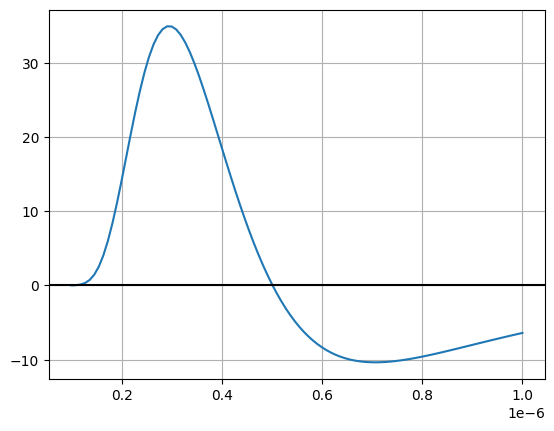

In [108]:
#b
def Du(l):
  t=5778
  l0 = h*c/(kB*t)
  x = l/l0
  K = 8*np.pi*kB*t/l0**4
  ter=(5*x+(1-5*x)*np.exp(1/x))/(x**7*(np.exp(1/x)-1)**2)
  return K*l0*ter
l=np.linspace(1e-7,1e-6,100)
plt.plot(l,Du(l))
plt.grid()
plt.axhline(0,color="black")
print("biseccion:",sc.bisect(Du,0.3e-6,0.8e-6))
print("newton:", sc.newton(Du,0.3e-6))
print("ley de wien:",sc.bisect(Du,0.3e-6,0.8e-6)*5778)

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

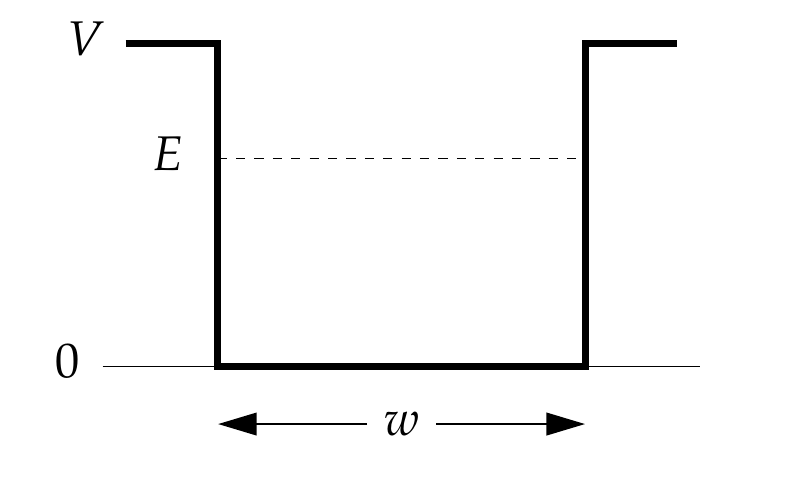

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

<ipython-input-109-ba969f5f1678>:7: RuntimeWarning: divide by zero encountered in divide
  y2= lambda e: ((v-e)/e)**(1/2)
<ipython-input-109-ba969f5f1678>:8: RuntimeWarning: divide by zero encountered in divide
  y3= lambda e: -((e/(v-e))**(1/2))


Text(0.5, 0, 'energias permitidas (E)')

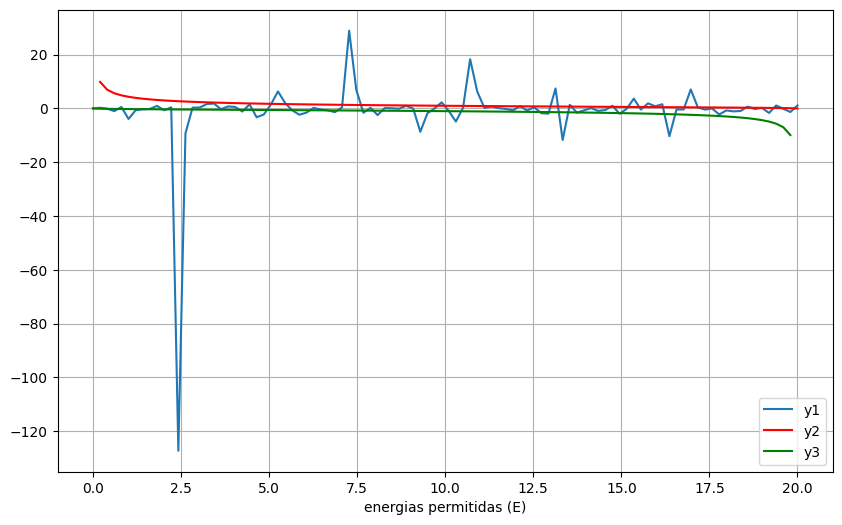

In [109]:
#a
m=9.11e-31
v=20
w=1
h=1.054571817e-34
y1= lambda e: np.tan(((w**2*m*e)/(2*h**2))**(1/2))
y2= lambda e: ((v-e)/e)**(1/2)
y3= lambda e: -((e/(v-e))**(1/2))
e=np.linspace(0,20,100)
plt.figure(figsize=(10,6))
plt.plot(e,y1(e),label="y1")
plt.plot(e,y2(e),color="red",label="y2")
plt.plot(e,y3(e),color="green",label="y3")
plt.grid()
plt.legend(loc="lower right")
plt.xlabel("energias permitidas (E)")

In [110]:
def f_par(E):
  if E <= 0 or E >= v:
    return np.nan
  return np.tan(y1(E)) - np.sqrt((v - E) / E)
def f_impar(E):
  if E <= 0 or E >= v:
    return np.nan
  return np.tan(y1(E)) + np.sqrt(E / (v - E))
def enc_niveles(f, n):
  niveles = []
  E = np.linspace(0.1, v - 0.1, 1000)
  for i in range(len(E) - 1):
    a, b = E[i], E[i+1]
    if f(a) * f(b) < 0:
      raiz = sc.bisect(f, a, b)
      if raiz and (len(niveles) == 0 or abs(raiz - niveles[-1]) > 0.01):
        niveles.append(raiz)
      if len(niveles) ==n:
        break
  return niveles
niveles = sorted(enc_niveles(f_par, 3) + enc_niveles(f_impar, 3))
print("Primeros 6 niveles de energía:")
for i, E in enumerate(niveles):
    print(f"Nivel {i}: E = {E} eV")

Primeros 6 niveles de energía:
Nivel 0: E = 0.10577743344652878 eV
Nivel 1: E = 0.13746212928478296 eV
Nivel 2: E = 0.17054535851106972 eV
Nivel 3: E = 0.7340793895280316 eV
Nivel 4: E = 0.8531531531519994 eV
Nivel 5: E = 1.110810810809657 eV


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

distancia desde la tierra a l1: 326045071.66535544 m


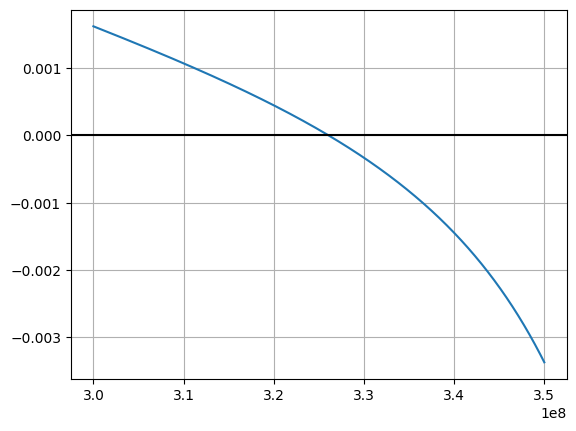

In [111]:
import scipy.optimize as sc
G=6.674e-11
M=5.974e24
m=7.348e22
R=3.844e8
w=2.662e-6
f=lambda r: G*M/r**2-G*m/(R-r)**2-w**2*r
r=np.linspace(300000e3,350000e3,1000)
plt.plot(r,f(r))
plt.grid()
plt.axhline(0,color="black")
print("distancia desde la tierra a l1:", sc.newton(f,3.1e8),"m")